In [192]:
import selenium
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException

### Q1-Write a python program which searches all the product under a particular product from www.amazon.in.
The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search
for guitars.

In [3]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [4]:
product_input=input("please enter product to be searched on amazon:")

please enter product to be searched on amazon:guitar


In [5]:
#opening Amazon site and searching for product
driver.get("https://www.amazon.in/")
time.sleep(5)
product=driver.find_element(By.ID,'twotabsearchtextbox')
product.send_keys(product_input)

In [6]:
search=driver.find_element(By.ID,'nav-search-submit-button')
search.click()

In [8]:
product_url=[]

In [9]:

for page in range(3): #getting first 3 pages data
    print("At Page:",page)
    products_link=driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a[1]')
    for i in products_link:#Getting links of all products in each page

        product_url.append(i.get_attribute('href'))
        next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')

        
        
print("Length of product links:",len(product_url))
        
    

At Page: 0
At Page: 1
At Page: 2
Length of product links: 12


In [13]:
#Making empty lists of reuired items to be fetched

brand_name=[] 
product_name=[]
rating=[] 
num_ratings=[]
price=[] 
return_exchange=[] 
expected_delivery=[]
availability=[] 


In [14]:
print("Getting the other details") #this will be final code

for url in product_url:
    driver.get(url)
    time.sleep(10)

        #Getting the brand name:
    try:
        brand_tag=driver.find_element(By.XPATH,'//tr[@class="a-spacing-small po-brand"]/td[2]')
        brand_name.append(brand_tag.text) #brand name
     
    except:
        brand_name.append("-")
    
    try:#getting model name
        model_tag=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[43]/div/table/tbody/tr[2]/td[2]/span')
        product_name.append(model_tag.text)
    except:
        product_name.append("-")
        
    
    try:#getting price
        price_tag=driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-none aok-align-center"]')
        price.append(price_tag.text.split("\n")[1])
        
    except:
        price.append("-")
    
    
    try: #getting rating 
        rate_tag=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[19]/div/div/div/div[2]/div[1]/div/div/table/tbody/tr[2]/td')
        rating.append(rate_tag.text.split("\n")[1])
    except:
        rating.append("-")      
    
    try: #num of ratings
        rating_tag=driver.find_element(By.ID,'acrCustomerReviewText')
        num_ratings.append(rating_tag.text)
    except:
        num_ratings.append("-")       
        
    try:#getting Availabilty
        avail_tag=driver.find_element(By.ID,'availability')
        availability.append(avail_tag.text)
        
    except:
        availability.append("-")
  
    try:#getting Retuen exchange
        ret_tag=driver.find_element(By.ID,'RETURNS_POLICY')
        return_exchange.append(ret_tag.text)
        
    except:
        return_exchange.append("-")   
        
    try:#getting Delivery date of product
        delivery_tag=driver.find_element(By.XPATH,'//div[@class="a-spacing-base"]')
        expected_delivery.append(delivery_tag.text.split(".")[0])
        
    except:
        expected_delivery.append("-")
        
    

Getting the other details


In [60]:
driver.close() 

In [15]:
print("Length of Brand:",len(brand_name))
print("Length of Product:",len(product_name))
print("Length of rating:",len(rating))
print("Length of num_ratings:",len(num_ratings))
print("Length of price:",len(price))
#print("Length of other_details:",len(other_details))
print("Length of expected_delivery:",len(expected_delivery))
print("Length of availability:",len(availability))
print('Length of exchange:',len(return_exchange))

Length of Brand: 12
Length of Product: 12
Length of rating: 12
Length of num_ratings: 12
Length of price: 12
Length of expected_delivery: 12
Length of availability: 12
Length of exchange: 12


In [16]:
amazon=pd.DataFrame({})
amazon['Brand']=brand_name
amazon['Name']=product_name
amazon['Rating']=rating
amazon['No. Of Ratings']=num_ratings
amazon['Price']=price
amazon['Delivery']=expected_delivery
amazon['Availability']=availability
amazon['Exchange']=return_exchange
amazon['Product link']=product_url
print("Fetching successfull")
print('saved to csv')
amazon.to_csv('amazon'+product_input+'.csv')


Fetching successfull
saved to csv


In [17]:
amazon

,Brand,Name,Rating,No. Of Ratings,Price,Delivery,Availability,Exchange,Product link
0,-,-,-,-,-,-,-,-,https://www.amazon.in/Fender-Dread-String-Acou...
1,-,-,-,-,-,-,-,-,https://www.amazon.in/Yamaha-FS100C-Acoustic-G...
2,-,-,-,-,-,-,-,-,https://www.amazon.in/Rosewood-Fretboard-Acous...
3,-,-,-,-,-,-,-,-,https://www.amazon.in/Kadence-6-strings-Acoust...
4,-,-,-,-,-,-,-,-,https://www.amazon.in/Fender-Dread-String-Acou...
5,-,-,-,-,-,-,-,-,https://www.amazon.in/Yamaha-FS100C-Acoustic-G...
6,-,-,-,-,-,-,-,-,https://www.amazon.in/Rosewood-Fretboard-Acous...
7,-,-,-,-,-,-,-,-,https://www.amazon.in/Kadence-6-strings-Acoust...
8,-,-,-,-,-,-,-,-,https://www.amazon.in/Fender-Dread-String-Acou...
9,-,-,-,-,-,-,-,-,https://www.amazon.in/Yamaha-FS100C-Acoustic-G...


#### Q3-Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’
    

In [18]:
from selenium.common.exceptions import ElementClickInterceptedException
import os
from PIL import Image
import io

import requests


In [19]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [20]:
driver.get('https://images.google.com/')
time.sleep(5)

In [21]:
keyword=driver.find_element(By.CLASS_NAME,'gLFyf')
keyword.send_keys("fruits")

In [22]:
search=driver.find_element(By.CLASS_NAME,'Tg7LZd')
search.click()

In [23]:
image_result=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
totalResults=len(image_result)


In [41]:
totalResults=image_result[0:10]
totalResults

[<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="548248bc-b15e-4eda-a8e7-9476d26f653c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="017d3d35-c3e7-44e0-8b3b-7068ffac9136")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="dcbbb87e-294c-4e4b-9b1c-5619e4a1eeb2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="962f4e26-3a1a-47af-8d51-40d6fc4b9111")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="e681bd5c-fe65-4abd-8054-fc4f21491826")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="0e12a040-01c9-4c4e-964a-745ef4777688")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="1dc77759-72f6-4f1e-a870-75

In [29]:
len(url)

48

In [31]:
#Click on each Image to extract its corresponding link to download
img_urls = set()
for i in range(0,len(image_result)):
    if i <=10:
        img=image_result[i]
               
    print(img)
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR,'img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="63f26dfb-d046-48b3-aab2-433b522da153")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="79f3e695-ec90-45c7-bf45-c5cdefcf6a1a")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="3f5f887f-3068-487b-8686-3f6c19ddf958")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="866eb9b8-8a7b-4c2a-8d85-0aa8fa51081c")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="91ca02af-7add-4782-a324-7f0148a275a8")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="192f1648-24d2-4f56-84e2-1fe9eff61803")>
<selenium.webdriver.remote.webelement.WebElement (session="4c8ac3b6d4941737a2dee1b105d9d093", element="371db48d-15e8-4980-9cd2-4b3ebe1b4f93")>

In [32]:
os.chdir(r'C:\Users\hp\Desktop\learnings\google\fruits')       
baseDir=os.getcwd()
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/assortment-of-colorful-ripe-tropical-fruits-top-royalty-free-image-995518546-1564092355.jpg - AT: C:\Users\hp\Desktop\learnings\google\fruits\                                                                                                                                                     0.jpg
SAVED - https://engdic.org/wp-content/uploads/2022/03/15-Fruits-Name-with-Pictures.png - AT: C:\Users\hp\Desktop\learnings\google\fruits\                                                                                                                                                     1.jpg
SAVED - https://i.pinimg.com/736x/8a/6b/44/8a6b4439916eb8c3d52cbc2de66150d7.jpg - AT: C:\Users\hp\Desktop\learnings\google\fruits\                                                                                                                                                     2.jpg
SAVED - https://www.healthyeating.org/images/default-sour

In [33]:
driver.close()

### Car images Scrapping

In [34]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [35]:
driver.get('https://images.google.com/')
time.sleep(5)

In [36]:
keyword=driver.find_element(By.CLASS_NAME,'gLFyf')
keyword.send_keys("Cars")

In [37]:
search=driver.find_element(By.CLASS_NAME,'Tg7LZd')
search.click()

<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="548248bc-b15e-4eda-a8e7-9476d26f653c")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="017d3d35-c3e7-44e0-8b3b-7068ffac9136")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="dcbbb87e-294c-4e4b-9b1c-5619e4a1eeb2")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="962f4e26-3a1a-47af-8d51-40d6fc4b9111")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="e681bd5c-fe65-4abd-8054-fc4f21491826")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="0e12a040-01c9-4c4e-964a-745ef4777688")>
<selenium.webdriver.remote.webelement.WebElement (session="0199328b717e869dcbd89dd533af1532", element="1dc77759-72f6-4f1e-a870-757357b3407f")>
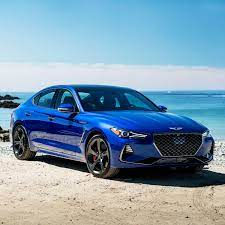
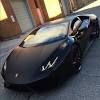
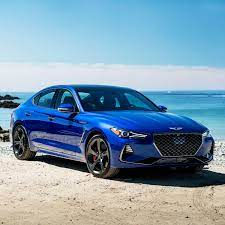
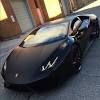
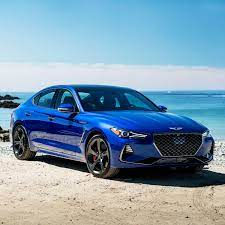
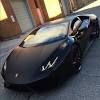
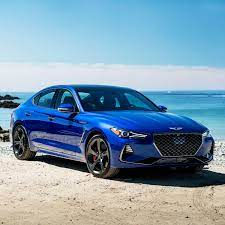
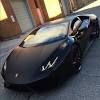
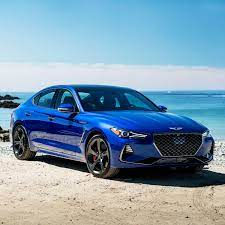
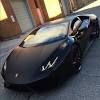
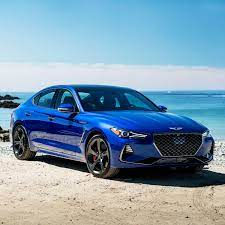
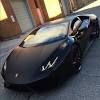
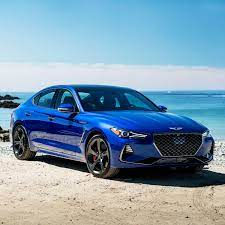
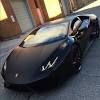
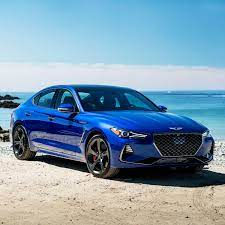
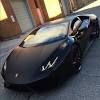
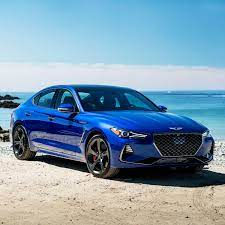
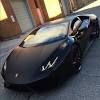
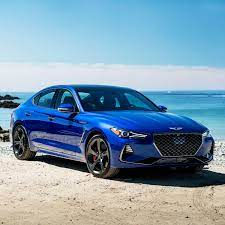
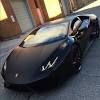
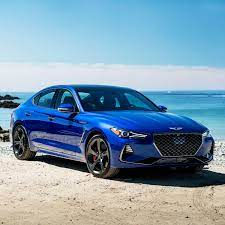
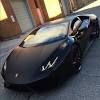
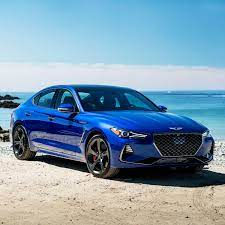
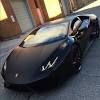
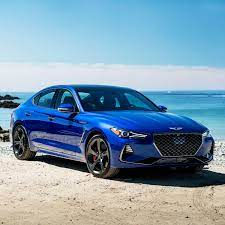
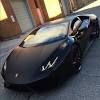
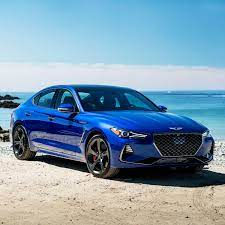
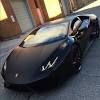
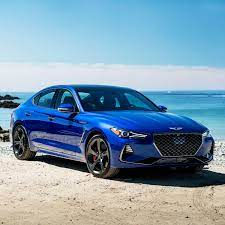
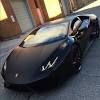
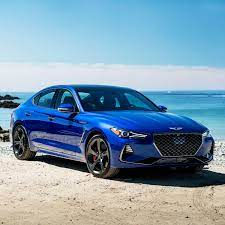
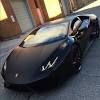
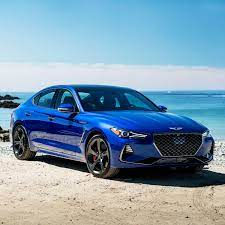
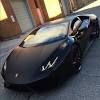
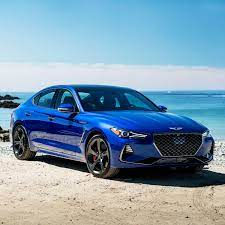
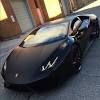
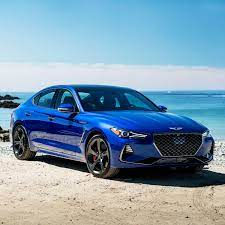
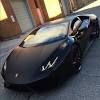
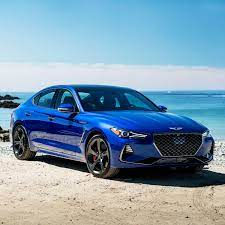
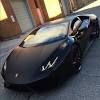
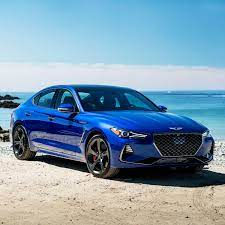
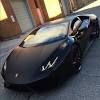
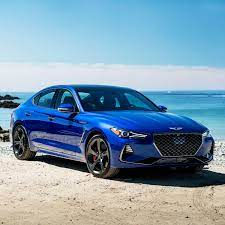
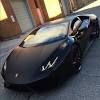
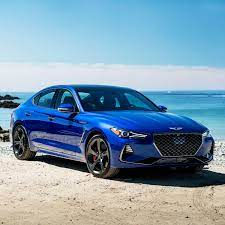
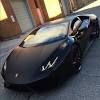
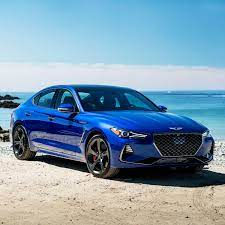
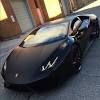
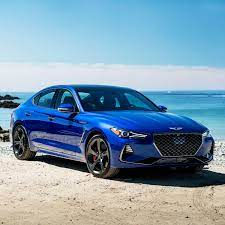
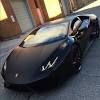
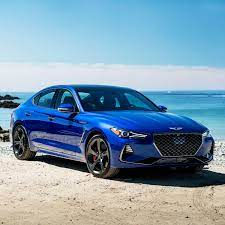
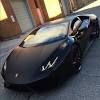
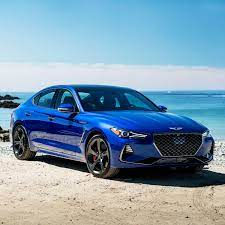
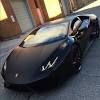
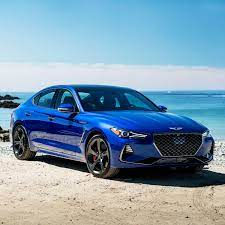
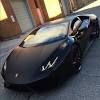
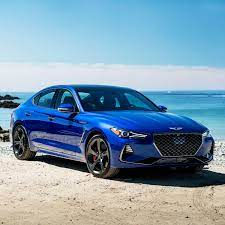
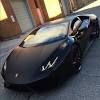
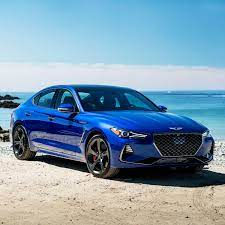
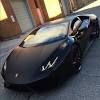
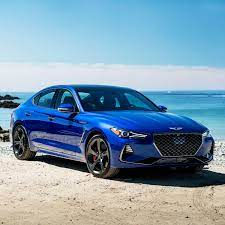
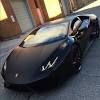
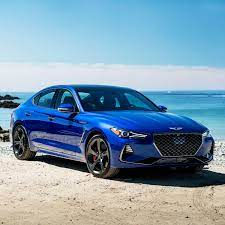
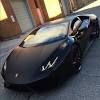
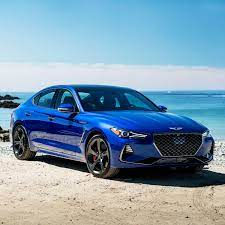
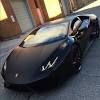
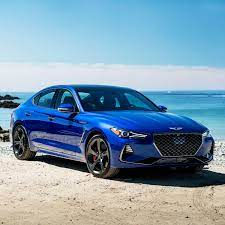
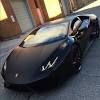

In [38]:
image_result=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
totalResults=len(image_result)

img_urls = set()
for i in range(0,len(image_result)):
    if i <=10:
        img=image_result[i]
               
    print(img)
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR,'img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [39]:
os.chdir(r'C:\Users\hp\Desktop\learnings\google\cars')       
baseDir=os.getcwd()
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://media.wired.com/photos/5d09594a62bcb0c9752779d9/1:1/w_1500,h_1500,c_limit/Transpo_G70_TA-518126.jpg - AT: C:\Users\hp\Desktop\learnings\google\cars\                                                                                                                                                     0.jpg
SAVED - https://stimg.cardekho.com/images/carexteriorimages/930x620/Bentley/Flying-Spur/7776/1645012163948/front-left-side-47.jpg - AT: C:\Users\hp\Desktop\learnings\google\cars\                                                                                                                                                     1.jpg
SAVED - https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/new-ghost-white-fr-3-4-1-1598911711.jpg - AT: C:\Users\hp\Desktop\learnings\google\cars\                                                                                                                                                     2.jpg
SAVED - https://images.hindustantime

### Machine Learning images scrappimg

In [42]:
driver.get('https://images.google.com/')
time.sleep(5)

In [43]:
keyword=driver.find_element(By.CLASS_NAME,'gLFyf')
keyword.send_keys("Machine Learning")
search=driver.find_element(By.CLASS_NAME,'Tg7LZd')
search.click()

In [ ]:
image_result=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
totalResult=len(image_result)

img_urls = set()
for i in range(0,len(image_result)):
    if i <=10:
        img=mage_result[i]
               
    print(img)
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR,'img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [46]:
os.chdir(r'C:\Users\hp\Desktop\learnings\google\Machine Learning')       
baseDir=os.getcwd()
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://www.expert.ai/wp-content/uploads/2022/03/Machine-Learning-Definition.jpg - AT: C:\Users\hp\Desktop\learnings\google\Machine Learning\                                                                                                                                                     0.jpg
SAVED - https://cdn.britannica.com/40/216540-138-14385CFE/How-machine-learning-is-predicting-synthetic-products.jpg?w=800&h=450&c=crop - AT: C:\Users\hp\Desktop\learnings\google\Machine Learning\                                                                                                                                                     1.jpg
SAVED - https://media.geeksforgeeks.org/wp-content/cdn-uploads/machineLearning3.png - AT: C:\Users\hp\Desktop\learnings\google\Machine Learning\                                                                                                                                                     2.jpg
SAVED - https://miro.medium.com/max/1400/1*cG6U

### Guitar Images Scrapping

In [48]:

driver.get('https://images.google.com/')
time.sleep(5)
keyword=driver.find_element(By.CLASS_NAME,'gLFyf')
keyword.send_keys("guitar")
search=driver.find_element(By.CLASS_NAME,'Tg7LZd')
search.click()

In [49]:
image_result=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
totalResults=len(image_result)

img_urls = set()
for i in range(0,len(image_result)):
    if i <=10:
        img=image_result[i]
               
    #print(img)
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR,'img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [50]:
os.chdir(r'C:\Users\hp\Desktop\learnings\google\guitar')       
baseDir=os.getcwd()
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://m.media-amazon.com/images/I/61+fz+3k-ZL._SL1280_.jpg - AT: C:\Users\hp\Desktop\learnings\google\guitar\                                                                                                                                                     0.jpg
SAVED - https://cdn.shopify.com/s/files/1/0657/6821/products/YAMAHAPACIFICA012RM.jpg?v=1656652970 - AT: C:\Users\hp\Desktop\learnings\google\guitar\                                                                                                                                                     1.jpg
SAVED - https://images.pexels.com/photos/1010519/pexels-photo-1010519.jpeg?cs=srgb&dl=pexels-jessica-lewis-creative-1010519.jpg&fm=jpg - AT: C:\Users\hp\Desktop\learnings\google\guitar\                                                                                                                                                     2.jpg
SAVED - https://yamaha.ndcdn.in/media/catalog/product/cache/9e0f31af0cdc06df956748b

### Cakes Images Scrapping


In [51]:

driver.get('https://images.google.com/')
time.sleep(5)
keyword=driver.find_element(By.CLASS_NAME,'gLFyf')
keyword.send_keys("cakes")
search=driver.find_element(By.CLASS_NAME,'Tg7LZd')
search.click()

In [52]:
image_result=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
totalResults=len(image_result)

img_urls = set()
for i in range(0,len(image_result)):
    if i <=10:
        img=image_result[i]
               
    #print(img)
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR,'img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [53]:
os.chdir(r'C:\Users\hp\Desktop\learnings\google\cakes')       
baseDir=os.getcwd()
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content
        
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://cdn.shopify.com/s/files/1/0018/9340/0623/products/butterfly-theme-pinata-cake_512x.jpg?v=1612762077 - AT: C:\Users\hp\Desktop\learnings\google\cakes\                                                                                                                                                     0.jpg
SAVED - https://www.fnp.com/images/pr/l/v20221130174930/rose-paradise-chocolate-cake-1-kg_1.jpg - AT: C:\Users\hp\Desktop\learnings\google\cakes\                                                                                                                                                     1.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Pound_layer_cake.jpg/640px-Pound_layer_cake.jpg - AT: C:\Users\hp\Desktop\learnings\google\cakes\                                                                                                                                                     2.jpg
SAVED - https://imgmedia.lbb.in/media/2020/03/5e6f51097c17730d

In [54]:
driver.close()

### Q4-Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be 
scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [193]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [199]:
#Taking the input from user 
item=input("Enter the item you want to find: ")

Enter the item you want to find: vivo


In [195]:
driver.get("https://www.flipkart.com/")
time.sleep(3)

In [196]:
try:
    popup=driver.find_element(By.XPATH,"//button[@class='_2KpZ6l _2doB4z']")
    popup.click()
except:
    pass

In [200]:
#search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.)
products=driver.find_element(By.CLASS_NAME,'_3704LK')
products.send_keys(item)

search=driver.find_element(By.CLASS_NAME,'_34RNph')
search.click()

In [201]:
#empty list created
product_links=[]
brands=[]
model_name=[] #done
colour=[] #done
ram=[] #done
rom=[] #done
p_camera=[] #done
s_camera=[] #done
disp_size=[] #done
battery_capacity=[] #done
price=[] #done
product_url=[] #done

In [202]:
#getting num of links on page 1st for product
link=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for url in link:
    product_links.append(url.get_attribute('href'))
    


In [209]:
len(colour)

24

In [206]:
try:
    brand_details=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in brand_details:
        brand=(i.text.split(" ")[0])
        brands.append(brand)      
    
except:

    brands.append(brand)
    
try: #display size
    disp_tags=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[2]')
    for i in disp_tags:
        disp_size.append(i.text)
except:
     disp_size.append("-")
try:
    battery_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[4]')
    for i in battery_tag:
        battery_capacity.append(i.text)
        
except:
    battery_capacity.append("-")
try: #rom details
    ram_details=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[1]')
    rams=[i.text.split('|') for i in ram_details]
    for i in rams:
        if len(i)>1:
            rom.append(i[1])
        else:
            rom.append('-')
except:
    rom.append('-')
try: #ram details
    ram_details=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[1]')
    rams=[i.text.split('|') for i in ram_details]
    for i in rams:
        if len(i)>1:
            ram.append(i[0])
        else:
            ram.append('-')
except:
    ram.append('-')
try:#model_name
    mobile_name=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in mobile_name:
        model_name.append(i.text.split("(")[0])
except:
    model_name.appenb('-')
try: #price
    price_tag=driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
    for i in price_tag:
        price.append(i.text)
        
except:
    price.append("-")

try: #for color
    color_tag=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')#for color
    for i in color_tag:
        j=(i.text.split("(")[1])
        colour.append(j.split(",")[0])
        
except:
    colour.append("-")
try:
    camera_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[3]')
    for i in camera_tag:
        j=(i.text)
       # print(j)
        p_camera.append(j)
except:
    p_camera.append('-')
try:
    cam_details=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[3]')
    cams=[i.text.split('|') for i in cam_details]
    for i in cams:
        if len(i)>1:
            s_camera.append(i[1])
        else:
            s_camera.append('-')
except:
    s_camera.append('-')
       

In [208]:
print(len(brands),len(disp_size),len(battery_capacity),len(rom),len(ram))
print(len(model_name),len(price),len(p_camera),len(s_camera),len(product_links),len(colour))

24 24 24 24 24
24 24 24 24 24 24


In [210]:
flipkart=pd.DataFrame({}) #making dataframe
flipkart['Brand']=brands
flipkart['Model Name']=model_name
flipkart['Colour']=colour
flipkart['RAM']=ram
flipkart['Storage']=rom
flipkart['Primary Camera']=p_camera
flipkart['Front camera']=s_camera
flipkart['Display Size']=disp_size
flipkart['Battery Capacity']=battery_capacity
flipkart['Price']=price
flipkart['Product URL']=product_links


In [212]:
flipkart.to_csv('flipkart-'+item+'.csv')
flipkart     


,Brand,Model Name,Colour,RAM,Storage,Primary Camera,Front camera,Display Size,Battery Capacity,Price,Product URL
0,vivo,vivo T1 44W,Starry Sky,4 GB RAM,128 GB ROM,50MP + 2MP + 2MP | 16MP Front Camera,16MP Front Camera,16.36 cm (6.44 inch) Full HD+ AMOLED Display,5000 mAh Lithium Battery,"₹14,499",https://www.flipkart.com/vivo-t1-44w-starry-sk...
1,vivo,vivo T1 44W,Midnight Galaxy,4 GB RAM,128 GB ROM,50MP + 2MP + 2MP | 16MP Front Camera,16MP Front Camera,16.36 cm (6.44 inch) Full HD+ AMOLED Display,5000 mAh Lithium Battery,"₹14,499",https://www.flipkart.com/vivo-t1-44w-midnight-...
2,vivo,vivo T1X,Space Blue,4 GB RAM,64 GB ROM,50MP + 2MP | 8MP Front Camera,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/vivo-t1x-space-blue-6...
3,vivo,vivo T1X,Gravity Black,4 GB RAM,64 GB ROM,50MP + 2MP | 8MP Front Camera,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/vivo-t1x-gravity-blac...
4,vivo,vivo T1X,Gravity Black,4 GB RAM,128 GB ROM,50MP + 2MP | 8MP Front Camera,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"₹12,999",https://www.flipkart.com/vivo-t1x-gravity-blac...
5,vivo,vivo T1 44W,Midnight Galaxy,6 GB RAM,128 GB ROM,50MP + 2MP + 2MP | 16MP Front Camera,16MP Front Camera,16.36 cm (6.44 inch) Full HD+ AMOLED Display,5000 mAh Lithium Battery,"₹15,999",https://www.flipkart.com/vivo-t1-44w-midnight-...
6,vivo,vivo T1X,Space Blue,6 GB RAM,128 GB ROM,50MP + 2MP | 8MP Front Camera,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"₹14,999",https://www.flipkart.com/vivo-t1x-space-blue-1...
7,vivo,vivo T1X,Space Blue,4 GB RAM,128 GB ROM,50MP + 2MP | 8MP Front Camera,8MP Front Camera,16.71 cm (6.58 inch) Full HD+ Display,5000 mAh Battery,"₹12,999",https://www.flipkart.com/vivo-t1x-space-blue-1...
8,vivo,vivo T1 44W,Starry Sky,6 GB RAM,128 GB ROM,50MP + 2MP + 2MP | 16MP Front Camera,16MP Front Camera,16.36 cm (6.44 inch) Full HD+ AMOLED Display,5000 mAh Lithium Battery,"₹15,999",https://www.flipkart.com/vivo-t1-44w-starry-sk...
9,vivo,vivo T1 44W,Midnight Galaxy,8 GB RAM,128 GB ROM,50MP + 2MP + 2MP | 16MP Front Camera,16MP Front Camera,16.36 cm (6.44 inch) Full HD+ AMOLED Display,5000 mAh Lithium Battery,"₹17,999",https://www.flipkart.com/vivo-t1-44w-midnight-...


In [ ]:
driver.close()

### Q5-Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google
maps.

In [214]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [215]:
driver.get('https://www.google.com/maps')
time.sleep(3) 

In [220]:
#Taking the input
city=input("enter the city you want to search :")

enter the city you want to search :jaipur


In [221]:
#search bar
city_serach=driver.find_element(By.ID,'searchboxinput')
city_serach.send_keys(city)

In [222]:
search=driver.find_element(By.ID,'searchbox-searchbutton')
search.click()

In [223]:
#Getting current url
cityurl=driver.current_url
urls=cityurl.split('@')
loc=urls[1].split(',')
coordinates=loc[:2]

#Printing the coordinates of the city
print(f'co-ordinates of {city}:',coordinates)

co-ordinates of jaipur: ['28.6429359', '76.5341034']


In [224]:
driver.close()

### Q6-Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) 
from trak.in.

In [225]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [226]:
page=driver.get('https://trak.in/stories/')
time.sleep(3)

In [228]:
search=driver.find_element(By.XPATH,'//li[@class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-1237902"]/a')
link=search.get_attribute('href')

In [230]:
driver.get(link)
time.sleep(5)

In [231]:
driver.close()

### Q7-Write a program to scrap all the available details of best gaming laptops from
digit.in

In [55]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [56]:
driver.get("https://www.digit.in/")

In [57]:
#select top 10 option
top10=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[3]/a')
top10.click()
time.sleep(10)

In [58]:
#clicked on best gaming laptop lisn
gaming_link=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[3]/div/div/div[2]/div/ul[2]/li[1]/a')
gaming_link.click()

In [64]:
detail=[]
title=[]
os=[] #done #
disp=[]#done
proc=[] #done
memory=[] #done
weight=[] #done
diemension=[] #done
graphics=[] #done
price=[] #done
description=[]

In [ ]:
try:#title
    title_tag=driver.find_elements(By.XPATH,'//div[@class="left_side"]/a/h3')
    for i in title_tag:
        title.append(i.text)
except:
    title.append("-")
try:
    details=driver.find_elements(By.XPATH,'//div[@class="value"]')
    for i in details:
        detail.append(i.text)
except:
    detail.append("-")
os=detail[0::4] #operating system

disp=detail[1::4] #display size

proc=detail[2::4] #processor

memory=detail[3::4] #memory

try: #for weigh
    weight_tag=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]')
    for i in weight_tag:
        weight.append(i.text.split("&")[1])
except:
    weight.append('-')
try: #for diemension
        dmsn_tag=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]')
        for i in dmsn_tag:
            diemension.append(i.text.split("&")[0])
except:
         diemension.append('-')
try: #for graphics
    grphc_tag=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[6]/td[3]')
    for i in grphc_tag:
         graphics.append(i.text)
except:
     graphics.append('-')
try:#for price
    price_tag=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]')
    for i in price_tag:
        price.append(i.text)
except:
    price.append('-')
price.insert(0,'-')


try: #for description
    describe=driver.find_elements(By.XPATH,'//div[@class="Section-center"]')
    for i in describe:
        description.append(i.text)
        
except:
    description.append('-')


In [125]:
print("Title:",len(title),"\ngraphics:",len(graphics),"\nDescription:",len(description),"\nOS:",len(os),"\nDisplay:",len(disp))
print("Memory:",len(memory),"\nWeight:",len(weight),"\nDiemension:",len(diemension),"\nProcessor:",len(proc),"\nPrice:",len(price))

Title: 10 
graphics: 10 
Description: 10 
OS: 10 
Display: 10
Memory: 10 
Weight: 10 
Diemension: 10 
Processor: 10 
Price: 10


In [126]:
#Making Dataframe
gaming_laptop=pd.DataFrame({})
gaming_laptop['Product']=title
gaming_laptop['OS']=os
gaming_laptop['Display']=disp
gaming_laptop['Proceesor']=proc
gaming_laptop['Memory']=memory
gaming_laptop['Weight']=weight
gaming_laptop['Dimensions']=diemension
gaming_laptop['Graphics']=graphics
gaming_laptop['Price']=price
gaming_laptop['Description']=description

In [127]:
gaming_laptop.to_csv('gaming laptop.csv')
gaming_laptop

,Product,OS,Display,Proceesor,Memory,Weight,Dimensions,Graphics,Price,Description
0,MSI Titan GT77-12UHS,Windows 11 Home OS,"17.3"" (3840 x 2160) Display",12th Gen Intel Core i9-12900HX | NA Processor,2 TB SSD/64 GB DDR5 Memory,3.3 kg weight,397 x 330 x 23 mm dimension,16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics...,-,The very best MSI gaming laptop featuring an I...
1,Alienware X17 R2,Windows 11 Home OS,"17.3"" (1920 x 1080) Display",12th Gen Intel Core i9-12900H | 5 GHz Processor,1 TB SSD/32 GB DDR5 Memory,2.96 kg weight,299 x 359 x 21 mm dimension,16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics...,"₹ 389,990","Alienware, the premium gaming brand from Dell ..."
2,Acer Predator Triton 500 SE PT516-52s,Windows 11 OS,"16"" (2560 x 1600) Display",12th Gen Intel Core i7-12700H | 3.5 GHz Processor,2 TB SSD/32 GB DDR5 Memory,2.4 kg weight,262 x 359 x 20 mm dimension,8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics ...,"₹ 229,990",The Predator lineup from Acer has shown great ...
3,Omen By HP (16-B1371TX),Windows 11 Home OS,"16.1"" (2560 x 1440) Display",12th Gen Intel Core i7-12700H | 4.7 GHz Processor,1 TB SSD/8 GB DDR5 Memory,2.32 kg weight,369 x 248 x 23 mm dimension,8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics card,"₹ 176,490",Omen by HP is a premium gaming lineup which is...
4,Acer Predator Helios 300 AN515-45,Windows 11 Home OS,"15.6"" (2560 x 1440) Display",AMD Ryzen 9-5900HX | NA Processor,512 GB SSD/16 GB DDR4 Memory,2.4 kg weight,363 x 255 x 23.9 mm dimension,8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics card,"₹ 172,999",Acer Predator Helios 300 AN515-45 is the best ...
5,MSI Delta 15 (A5EFK-083IN),Windows 11 Home OS,"15.6"" (1920 x 1080) Display",AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor,1 TB SSD/16 GBGB DDR4 Memory,1.9 kg weight,357 x 247 x 19 mm dimension,10 GB DDR6 AMD Radeon RX 6700M Graphics card,"₹ 188,990",The best MSI gaming laptop with an AMD process...
6,Omen By HP (16-C0141AX),Windows 11 Home OS,"16.1"" (2560 x 1440) Display",AMD Ryzen™ 9 5900HX | 3.3 GHz Processor,1 TB NVMe/16 GB DDR4 Memory,2.3 kg weight,36.92 x 24.8 x 2.3 mm dimension,8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card,"₹ 124,990",Another worthy gaming laptop from the Omen lin...
7,Lenovo Legion 5i Pro (82RF00MGIN),Windows 11 Home OS,"16"" (2560 x 1600) Display",12th Gen Intel Core i7-12700H | 2.3 GHz Processor,1 TB SSD/16 GB DDR5 Memory,2.49 kg weight,360 x 264 x 20 mm dimension,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,"₹ 167,990",Lenovo has gone a little mainstream with their...
8,Alienware M15 R5 Ryzen Edition Icc-C780001win,Windows 11 Home OS,"15.6"" (1920 x 1080) Display",AMD Ryzen R7-5800H | 4.40 GHz Processor,512 GB SSD/16 GB DDR4 Memory,2.69 kg weight,356.2 x 272.5 x 22.85 mm dimension,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,"₹ 174,000",Dell not only has gaming laptops under the Del...
9,Lenovo Slim 7 Gen 6 (82K8002JIN),Windows 11 Home OS,15.6 MP | NA Display,Lenovo Ryzen 7-5800H | 3.2 GHz Processor,1 TB SSD/16 GB DDR4 Memory,1.9 kg weight,356 x 252 x 16 mm dimension,6 GB DDR6 NVIDIA GeForce 3060 Max-Q Graphics card,"₹ 131,990",Lenovo has been pushing for thinner gaming lap...


In [128]:
driver.close()

### Q8-Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.


In [382]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [383]:
driver.get("https://www.forbes.com/")
time.sleep(5)

In [384]:
#landing on billionare page
page=driver.find_element(By.XPATH,'/html/body/div[1]/main/section[8]/div[1]/a')
page.click()

In [385]:
billionaire_link=driver.find_element(By.XPATH,'/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a')
billionaire_link.click()
time.sleep(5)

In [386]:
#making empty list
rank=[]
name=[]
worth=[]
age=[]
country=[]
source=[]
tech=[]

In [387]:

try:
    names=driver.find_elements(By.XPATH,'//div[@class="personName"]')
    for i in names:
        name.append(i.text)
except:
    name.append('-')
print('Name:',len(name))

try:
    ranks=driver.find_elements(By.XPATH,'//div[@class="rank"]')
    for i in ranks:
        rank.append(i.text)
except:
    rank.append('-')
print('Rank:',len(rank))

try:
    networth=driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
    for i in networth:
        worth.append(i.text)
except:
    worth.append('-')
print('Worth:',len(worth))

try:
    citizenship=driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
    for i in citizenship:
        country.append(i.text)
except:
    country.append('-')
print('Country:',len(country))

try:
    sources=driver.find_elements(By.XPATH,'//div[@class="source-column"]')
    for i in sources:
        source.append(i.text)
except:
    source.append('-')
print('Source:',len(source))

try:
    industry=driver.find_elements(By.XPATH,'//div[@class="category"]/div[1]')
    for i in industry:
        tech.append(i.text)
except:
    tech.append('-')
print('industry:',len(tech))

try:
    age_tag=driver.find_elements(By.XPATH,'//div[@class="age"]/div[1]')
    for i in age_tag:
        age.append(i.text)
except:
    age.append('-')
print('Age:',len(age))

Name: 200
Rank: 200
Worth: 200
Country: 200
Source: 200
industry: 200
Age: 200


In [388]:
forbes=pd.DataFrame({})
forbes['Rank']=rank
forbes['Name']=name
forbes['Net Worth']=worth
forbes['Age']=age
forbes['Country']=country
forbes['Source']=source
forbes['industry']=tech


In [390]:
forbes.to_csv('forbes.csv')

In [391]:
forbes

,Rank,Name,Net Worth,Age,Country,Source,industry
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,79,United States,"movies, record labels",Media & Entertainment


In [392]:
driver.close()

### Q9-Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video


In [150]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC

In [129]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [249]:
driver.get("https://www.youtube.com/watch?v=H4YcqULY1-Q")#link of webpage

wait = WebDriverWait(driver,15)

In [171]:
comments=[] # for 500 comments only
data=[] #for full page comments

In [ ]:
 #empty list for comments
for item in range(3): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
            data.append(comment.text)

In [179]:
print("lenght of full data:",len(data))

lenght of full data: 1005


In [178]:
comments=data[1:501] #saving only 500 comments from data into comments
len(comments)

500

In [244]:
comment_time=[]#time of comment "published-time-text style-scope ytd-comment-renderer"

In [250]:
try:
    for item in range(5): #for time
        print("Item",item)
    
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)
        for time_tag in wait.until(EC.presence_of_all_elements_located((By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]'))):
               comment_time.append(time_tag.text)
except:
    comment_time.append("-")

Item 0
Item 1
Item 2
Item 3
Item 4


In [ ]:
comment_time[20:1000]

In [225]:
upvote=[]

In [226]:

try:
    for item in range(12):
        print("Item",item)
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

        for upvote_tag in wait.until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]'))):
            upvote.append(upvote_tag.text)
except:
    upvote.append("_")

Item 0
Item 1
Item 2
Item 3
Item 4
Item 5
Item 6
Item 7
Item 8
Item 9
Item 10
Item 11


In [237]:
print("total Upvote count",len(upvote))
new_upvote=[]

total Upvote count 5040


In [239]:
new_upvote=(upvote[3:1002:2])

In [242]:
print("500 upvotes:",len(new_upvote))

500 upvotes: 500


In [261]:
driver.close()

In [259]:
#making Dataframe
youtube=pd.DataFrame({})
youtube['Comments']=comments
youtube['Time']=comment_time[0:500]
youtube['Upvote']=new_upvote
youtube.to_csv('youtube.csv')

In [260]:
youtube

,Comments,Time,Upvote
0,This man deserves a great applause. Thank you ...,-,405
1,I wish I had found you a couple of months ago ...,,43
2,Thanks very much for your sacrifice sir. This ...,,5
3,THANK YOU for all this! I went from designing ...,,29
4,"I've already finished week 4. Now, moving to W...",,66
...,...,...,...
495,Pls give all the links of resources in the com...,2 years ago,
496,AI helps people with disabilities to overcome ...,2 years ago (edited),
497,Sir how much time it will take to cover all th...,,19
498,Thank you sir for this video! It is the best ...,1 year ago,


### Q10 Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, 
overall reviews, privates from price, dorms from price, facilities and property descriptio 

In [2]:
driver=webdriver.Chrome(r'chromedriver.exe')
driver.maximize_window()

In [3]:
driver.get('https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2023-01-29&to=2023-02-01&guests=2&page=1')

In [20]:
title=[] 
price=[]
distance=[]
rating=[] #/
total_reviews=[] 
overall_reviews=[]
private_price=[] 
dorms_price=[] 
facilities=[]
hostel_link=[] 

In [21]:
#for total hotel_link
try:
    page_link=driver.find_elements(By.XPATH,'//h2[@class="title title-6"]/a')
    for i in page_link:
        hostel_link.append(i.get_attribute('href'))
except:
    hostel_link.append("-")
print("Total no of hostel",len(hostel_link))

Total no of hostel 30


In [22]:
try:#title
    title_tag=driver.find_elements(By.XPATH,'//h2[@class="title title-6"]')
    for i in title_tag:
        title.append(i.text)
except:
    title.append("-")
print("Title",len(title))

try: #distance from City Center
    distance_tag=driver.find_elements(By.XPATH,'//span[@class="description"]')
    for i in distance_tag:
        distance.append(i.text)
except:
    distance.append("-")
print("Distance",len(distance))

#rating
try:
    rating_t=driver.find_elements(By.XPATH,'//div[@class="bottom-rating"]')
    for i in rating_t:
        rating.append(i.text.split("\n")[0])
    
except:
     rating.append("-")
print("Rating",len(rating))
                      
try:#Total revies
    total_reviewstag=driver.find_elements(By.XPATH,'//div[@class="reviews"]')
    for i in total_reviewstag:
        total_reviews.append(i.text)
except:
    total_reviews.append("-")
print("Total Reviews",len(total_reviews))
                      
try:#overall reviews
    overall_reviewstag=driver.find_elements(By.XPATH,'//div[@class="keyword"]/span')
    for i in overall_reviewstag:
        overall_reviews.append(i.text)
except:
    overall_reviews.append("-")
print("overall Reviews",len(overall_reviews))
try:
    prices=driver.find_elements(By.XPATH,'//div[@class="price-col"]')
    for i in prices:
        price.append(i.text)
except:
    price.append("-")
private_price=price[0::2]
dorms_price=price[1::2]
print("Private from Price",len(private_price))
print("Dorm price",len(dorms_price))
try:
    facility=driver.find_elements(By.XPATH,'//div[@class="facilities-label facilities"]')
    for i in facility:
        facilities.append(i.text)
except:
    facilities.append("-")
print("Facilities",len(facilities))

Title 30
Distance 30
Rating 30
Total Reviews 30
overall Reviews 32
Private from Price 30
Dorm price 30
Facilities 30


In [28]:
london_hostel=pd.DataFrame({'Name':title,
                            'Distance from city center':distance,
                            'Facilities':facilities,
                            'Ratings':rating,
                            'Private from Price':private_price,
                            'Dorm from Price':dorms_price,
                            'Total_Reviews':total_reviews,
                            'Overall Reviews':overall_reviews[0:30],
                            'Hostel Links':hostel_link
                            
                           })


In [29]:
london_hostel.to_csv('london_hostel.csv')

In [31]:
london_hostel.head()

,Name,Distance from city center,Facilities,Ratings,Private from Price,Dorm from Price,Total_Reviews,Overall Reviews,Hostel Links
0,NX London Hostel,Hostel - 6.1km from city centre,Free WiFi\nFree Breakfast,7.9,Privates From\nRs6334.96 Rs4434,Dorms From\nRs1809.81 Rs1448,1550 Total Reviews,Fabulous,https://www.hostelworld.com/pwa/hosteldetails....
1,Wombat's City Hostel London,Hostel - 3.6km from city centre,Free WiFi\nFollows Covid-19 sanitation guidance,8.9,Privates From\nRs13056.79 Rs10445,Dorms From\nRs3330.49 Rs2664,14521 Total Reviews,Fabulous,https://www.hostelworld.com/pwa/hosteldetails....
2,St Christopher's Village,Hostel - 1.8km from city centre,Free WiFi\nFollows Covid-19 sanitation guidance,8.0,Privates From\nRs6129.62 Rs5517,Dorms From\nRs1521.56 Rs1369,11869 Total Reviews,Very Good,https://www.hostelworld.com/pwa/hosteldetails....
3,Astor Hyde Park,Hostel - 4.3km from city centre,Free WiFi\nFollows Covid-19 sanitation guidance,8.9,Privates From\nRs9630,Dorms From\nRs1751,11870 Total Reviews,Fabulous,https://www.hostelworld.com/pwa/hosteldetails....
4,Hostel One Notting Hill,Hostel - 5.5km from city centre,Free WiFi,9.4,Privates From\nRs7896,Dorms From\nRs2449,1718 Total Reviews,Fabulous,https://www.hostelworld.com/pwa/hosteldetails....


In [32]:
driver.close()